<a href="https://colab.research.google.com/github/danielkaplanski/Sztuczna-inteligencja/blob/main/Lab_AI_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(tf.__version__)

2.18.0


In [2]:
observations=100000
xs = np.random.uniform(low=-10,high=10,size = (observations,1))
zs = np.random.uniform(low=-10,high=10,size=(observations,1))
inputs=np.column_stack((xs,zs))
print(inputs.shape)

(100000, 2)


In [3]:
noise = np.random.uniform(low=-1,high=1,size=(observations,1))
targets = 13 * xs + 7 * zs - 12 + noise
np.savez('TF_dataset',inputs=inputs,targets=targets)
print(targets.shape)

(100000, 1)


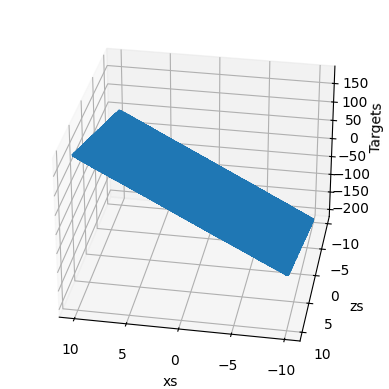

In [4]:
targets = targets.reshape(observations,)
xs=xs.reshape(observations,)
zs=zs.reshape(observations,)
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()

In [5]:
init_range = 0.1
weights = np.random.uniform(low=-init_range,high=init_range, size=(2,1))
biases = np.random.uniform(low=-init_range,high=init_range, size=1)
print(weights,biases)

[[ 0.09766941]
 [-0.09473914]] [-0.08520842]


In [6]:
targets = targets.reshape(observations,1)
eta = 0.01
for i in range(100):
  outputs = np.dot(inputs,weights) + biases
  deltas = outputs - targets

  loss=np.sum(deltas ** 2)/2/observations
  print(loss)

  deltas_scaled = deltas/observations
  weights = weights - eta * np.dot(inputs.T, deltas_scaled)
  biases = biases - eta * np.sum(deltas_scaled)

3693.6332487393784
1673.4067671682685
778.351794218692
381.38722503118754
204.92779117007768
126.09533098898702
90.49480054552038
74.04645495768386
66.09032849137779
61.907109013616505
59.40732094909309
57.665694100257745
56.272350809128135
55.04558277029736
53.90469849201386
52.81373263688572
51.75652568230689
50.725691289749776
49.71773187050236
48.730876040849815
47.76412111067611
46.81680907161441
45.88843878329744
44.97858273471583
44.0868501070312
43.21287033790184
42.356285764547195
41.516748288098924
40.69391781999533
39.8874615189402
39.09705337940083
38.322373977227656
37.563110286281265
36.81895552790987
36.08960903635153
35.37477613254079
34.67416800296157
33.98750158203388
33.314499437337744
32.65488965734169
32.00840574146252
31.374786492356304
30.753775910371445
30.14512309011111
29.548582119057198
28.96391197821365
28.390876444727507
27.829243996448046
27.278787718385452
26.739285211030705
26.210518500500118
25.69227395046784
25.18434217585093
24.686517958211958
24.1986

In [7]:
print(weights,biases)

[[12.9968266 ]
 [ 6.99704906]] [-7.63416846]


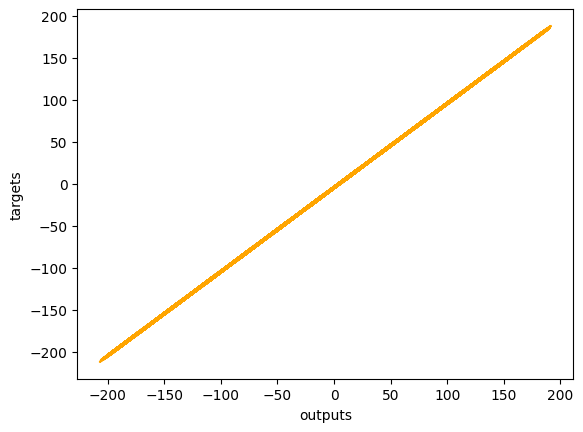

In [8]:
plt.plot(outputs, targets, color='orange')
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()
